<a href="https://colab.research.google.com/github/zamzfz/Kmeans-Algorithm/blob/master/K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

In [0]:
def find_centroids():
  k = 2
  centroid = {
      i + 1 : [random.choices(df['x']),random.choices(df['y'])]
      for i in range(k)
  }
  return centroid


In [0]:
def assignment(df,centroids):
    z = 0
    color = []
    # print(centroids[1][0],centroids[1][1])
    # print(centroids[2][0],centroids[2][1])


    for i in centroids.keys():
        df['jarak_c{}'.format(i)] = (np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2))

    jarak = ['jarak_c1','jarak_c2']
    df['closest'] = df.loc[:, jarak].idxmin(axis=1)
    tmp = df['closest']
    for i in tmp:

      df['closest'][z] = i[7:]
      # print(df['closest'])
      z+=1

    for i in df['closest']:
      if(i == '1'):
        color.append('r')
      else:
        color.append('g')

    df['color'] = pd.DataFrame(color)
    
    return df
# df = assignment(df, centroids)

In [0]:
def update_centroid():
  c1X,c1Y,c2X,c2Y,tmp1,tmp2 = 0,0,0,0,0,0
  # print(df['closest'])
  for i in range(len(df['closest'])):
    if df['closest'][i] == '1':
      c1X+=df['x'][i]
      c1Y+=df['y'][i]
      tmp1+=1
    else:
      c2X+=df['x'][i]
      c2Y+=df['y'][i]
      tmp2+=1

  centroids[1][0] = c1X/tmp1
  centroids[1][1] = c1Y/tmp1
  centroids[2][0] = c2X/tmp2
  centroids[2][1] = c2Y/tmp2

  return centroids
# update_centroid()



In [0]:
df = pd.read_csv('flame.csv')
df.columns = ['x','y',2]
del df[2]
# df  buat ngeliat data 

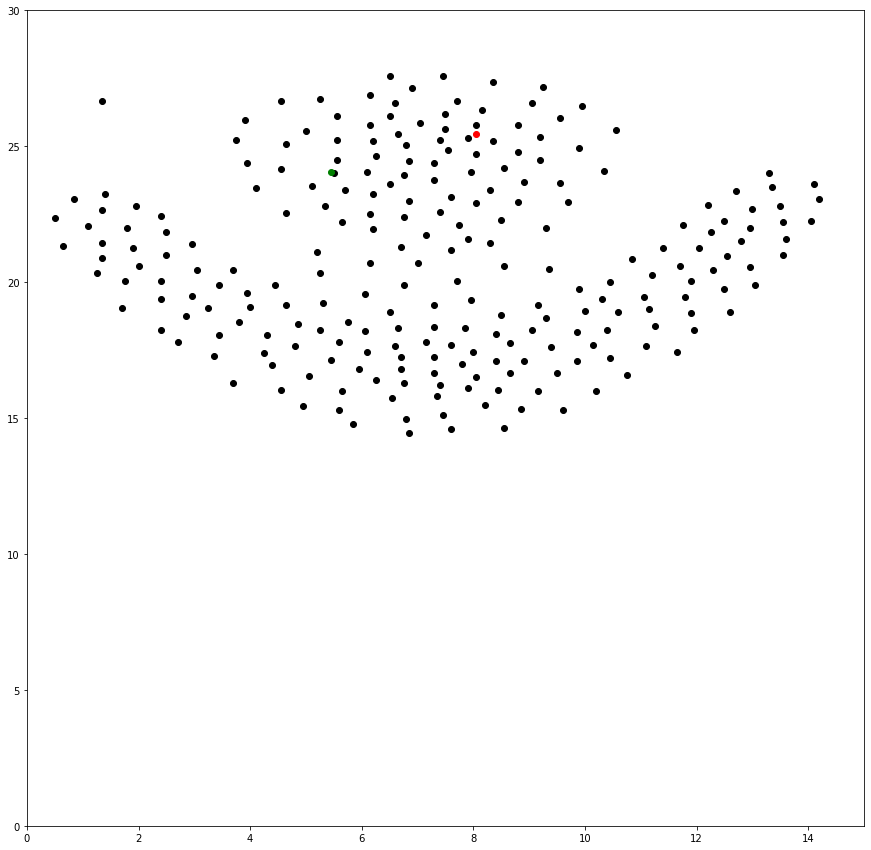

In [12]:
# Ini buat nentuin titik awal centroid 
centroids = find_centroids()

fig = plt.figure(figsize=(15, 15))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 15)
plt.ylim(0, 30)
plt.show()


[8.05] [25.45]
[5.45] [24.05]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


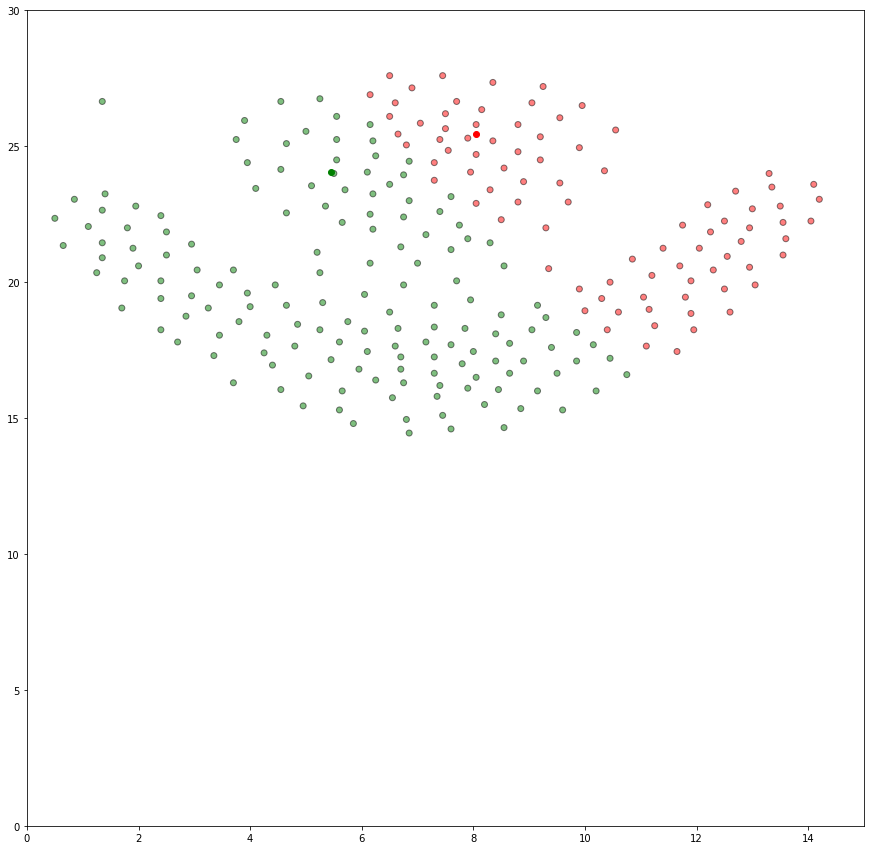

In [13]:
# Warnain Cluster 
update_c = centroids
konvergen = False
count = 0

df = assignment(df, centroids)

fig = plt.figure(figsize=(15, 15))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 15)
plt.ylim(0, 30)
plt.show()


10.174137931034478 22.929885057471264
5.728289473684209 19.737828947368413


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


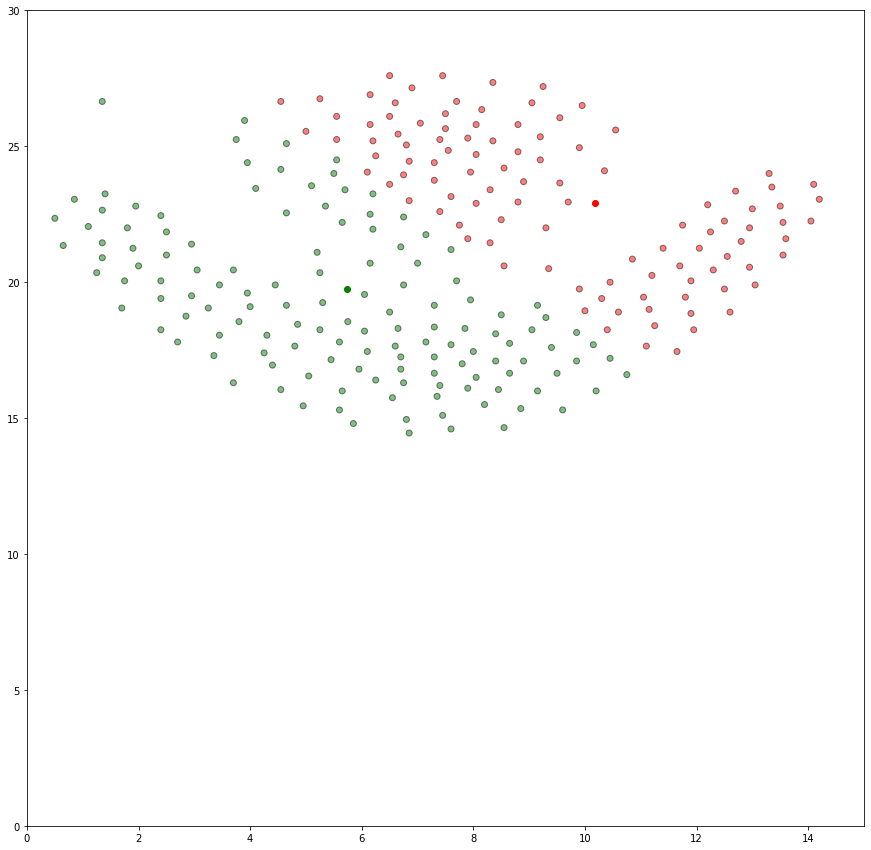

In [14]:
# update centroid sampe konvergen
while not konvergen:
  centroids = update_centroid()
  update_c = centroids

  if update_c == update_centroid():
    count += 1
  else:
    count = 0

  if count == 50:
    konvergen = True

df = assignment(df,centroids)

fig = plt.figure(figsize=(15, 15))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 15)
plt.ylim(0, 30)
plt.show()